# Creating a graph
제일 먼저, networkx 모듈을 임포트해줍니다.  
그 후, Graph()를 생성합니다.

In [1]:
import networkx as nx
G = nx.Graph()

`Graph` 는 nodes(vertices)와 nodes들 사이의 관계를 포함하고 있는 집합입니다.  
NetworkX에서 node들은 어떤 hashable object (text string, image, XML, another graph, ..., etc.) 가 될 수 있습니다.  
(Note: None object는 노드가 될 수 없습니다.)


# Nodes
Graph G는 다양한 방법으로 구성, 증가시킬 수 있습니다.  
NetworkX는 다양한 graph generator function들을 포함하고 있습니다.

In [2]:
G.add_node(1) #add one node
G.add_nodes_from([2,3]) #add a list of nodes


#or add any nbunch of nodes. An nbunch is any iterable contrainer (list, set, graph file, etc....)
H=nx.path_graph(10) #generate a graph 
G.add_nodes_from(H) #add nodes in H as nodes of graph G

G.add_node(H) #add 'graph H' as 'a node' of G

`G.add_nodes_from(H)` 는 H 그래프 안에 있는 노드들을 G 그래프에 추가한 것입니다.  
`G.add_node(H)`는 H라는 그래프 자체를 G의 노드로 추가한 것입니다. 노드는 다양한 hashble object라면 모두 추가 가능합니다.

# Edges
Graph G에 edge를 추가하는 대표적인 방법은 아래와 같습니다.

In [3]:
G.add_edge(1,2) #add an edge between node 1 & node 2
e = (2,3)
G.add_edge(*e) #unpack edge tuple* (add an edge btw node 2, 3)

#by adding a list of edges
G.add_edges_from([(1,2), (1,3)])

Edge를 추가 할때는 2-tuple 혹은 3-tuple 입니다.  
가능한 3번째 argument는 dictionary 형태로, 해당 edge의 attribute를 추가하는 것입니다.  
(예시: (2,3, {'weight':3.14})

In [5]:
G.add_edges_from(H.edges())

이외에도, `Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge(), Graph.remove_edges_from()` 등의 기능들이 있습니다.  
예를 들어, 

In [6]:
G.remove_node(H) #H 그래프 노드 삭제

In [7]:
# Removing all nodes and edges
G.clear()

In [8]:
#Reconstruction of Graph G

G.add_edges_from([(1,2),(1,3)]) #if there is no nodes, add them
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

In [11]:
print(G.number_of_nodes())
print(G.nodes())

8
[1, 2, 3, 'spam', 's', 'p', 'a', 'm']


In [12]:
print(G.number_of_edges()) # Q: 2? or 3?
print(G.edges())

2
[(1, 2), (1, 3)]


In [16]:
print(G.neighbors(1)) #return the neighbors of node 1
#Graph.neighbor 함수는 iterator를 리턴합니다.
print(list(G.neighbors(1)))

[2, 3]


In [18]:
#Removing nodes or edges
G.remove_nodes_from("spam") # remove s, p, a, m
print(G.nodes())

G.remove_edge(1,3)
print(G.edges())

[1, 2, 3, 'spam']
[(1, 2)]


# Accessing Edges

In [19]:
G[1]

AtlasView({2: {}})

#### *Warning* 위의 방식으로 데이터에 접근하여, 직접 구조를 확인할 수 있지만... 위의 방식의 결과를 직접 manipulating 하는 것은 데이터의 inconsistency가 높아질 수 있으므로 금지!  
예를 들어, G[1] = 2 이런 식으로 사용하지 마세요 !

In [20]:
G[1][2]

{}

In [21]:
G[2]

AtlasView({1: {}})

In [22]:
G.add_edge(1,3)
print(G.edges())
print(G[1])

[(1, 2), (1, 3)]
{2: {}, 3: {}}


In [23]:
# we can set the color of edge
G[1][3]['color'] = 'blue'

주로 사용하는 edge의 attribute는 `weight` 입니다.

In [47]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n, nbrs in FG.adjacency():
    for nbr, eattr in nbrs.items():
        data=eattr['weight']
        if data < 0.5: #print the edges, whose weight < 0.5
            print('(%d, %d, %.3f)' %(n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


**Warning**  
networkx 2.0 이하의 버전에서는 adjacency_iter, nodes_iter 등의 모듈이 있었지만,  
이후 버전에서는 adjacency, nodes 등의 모듈로 통합되었습니다.

# Adding attributes to graphs, nodes, and edges
weights, labels, colors, 또는 Python object 등과 같은 attribute 등을 grpahs, nodes, edges 등에 추가할 수 있습니다.  

각각의 graph, node, and edge는 key/value attribute pair를 가지고 있으며 (key는 당연히, hashable해야합니다.)  
기본적으로 default는 empty 상태입니다.  

하지만, attribute는 add_edge, add_node, 또는 직접 접근하는 방법으로 추가하거나 변경할 수 있습니다.

## Graph Attributes

In [48]:
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [49]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

## Node Attributes

In [50]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
print(G.node[1])

G.node[1]['room'] = 714
G.nodes(data=True)

{'time': '5pm'}


NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

## Edge Attributes

In [51]:
G.add_edge(1,2, weight=4.7)
G.add_edges_from([(3,4),(4,5)], color='red')

G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})]) #(1,2) edge는 이미 추가되어 있는데, 이 위에 color를 추가하는 상황이 됩니다.

In [55]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

In [65]:
print(G.edges[1, 2])
G.edges[3,4]['weight']=4.2 #기존 [3,4] edge에 weight 추가 !
print(G.edges[3, 4])

{'weight': 4.7, 'color': 'blue'}
{'color': 'red', 'weight': 4.2}


# Directed Graphs
Directed Graph를 생성하기 위해서는 `DiGraph` 클래스를 사용하면 됩니다.  
Directed Graph는 in, out 등의 방향성이 존재하기 때문에 `DiGraph.out_edges()`, `DiGraph.in_edges()`, `DiGraph.predecessors()`, `DiGraph.successors()` 등의 메쏘드을 사용합니다.  
(directed graph에서의 neighbor는 successors라고 생각하시면 됩니다. degree의 겨웅에도 `in_degree`, `out_degree`로 나누어 생각해야 합니다.)


In [70]:
DG = nx.DiGraph() #create directed graph
DG.add_weighted_edges_from([(1,2,0.5), (3,1, 0.75)]) #Constructe nodes and edges with weights

print("Out_Degree of Node 1:\t", DG.out_degree(1, weight='weight')) #print out degree of node 1
print("In_Degree of Node 1:\t", DG.in_degree(1, weight='weight')) #print in degree of node 1
print(list(DG.successors(1))) #print successors of node 1
print(list(DG.neighbors(1))) #print neighbors of node 1

Out_Degree of Node 1:	 0.5
In_Degree of Node 1:	 0.75
[2]
[2]


Directed Graph를 Undirected Graph로 변경하고 싶을 때는  
`Graph.to_undirected()` 메쏘드 또는 `nx.Graph()`로 wrapping 해주시면 됩니다.

In [79]:
# UDG1 = DG.to_undirected()
# UDG2 = nx.Graph(DG)

# Multigrpahs

NetworkX는 multiple edges를 가지는 그래프를 생성하도록 클래스를 지원하고 있습니다.  
Multigraph를 생성하기 위해서는 `MultiGraph` 와 `MultiDiGraph` 클래스를 사용하면 됩니다.  

In [80]:
MG = nx.MultiGraph() #create multi(undirected)graph
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)]) #multi edges between node1 and node2

print(dict(MG.degree(weight='weight')))
#The degree of node 1 is (0.5+0.75)= 1.25
#The degree of node 2 is (0.5+0.75+0.5)=1.75

{1: 1.25, 2: 1.75, 3: 0.5}


In [92]:
#Construct normal undirected graph, which edge has minimum weight in MG
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        print('Edge between ', n, nbr, ',\t multi edges:\t', edict) #multi edges are dictionary type
        min_value = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=min_value)
        
assert nx.shortest_path(GG, 1, 3) == [1,2,3]

Edge between  1 2 ,	 multi edges:	 {0: {'weight': 0.5}, 1: {'weight': 0.75}}
Edge between  2 1 ,	 multi edges:	 {0: {'weight': 0.5}, 1: {'weight': 0.75}}
Edge between  2 3 ,	 multi edges:	 {0: {'weight': 0.5}}
Edge between  3 2 ,	 multi edges:	 {0: {'weight': 0.5}}


# Graph generators and graph operations

이외에도, graph를 만들 수 있는 다양한 함수들과 operation 들이 포함되어 있습니다.

### 1. Classic graph operations

```
subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
union(G1,G2)             - graph union
disjoint_union(G1,G2)    - graph union assuming all nodes are different
cartesian_product(G1,G2) - return Cartesian product graph
compose(G1,G2)           - combine graphs identifying nodes common to both
complement(G)            - graph complement
create_empty_copy(G)     - return an empty copy of the same graph class
to_undirected(G) - return an undirected representation of G
to_directed(G)   - return a directed representation of G
```

### 2. Classic small graphs
```
>>> petersen = nx.petersen_graph()
>>> tutte = nx.tutte_graph()
>>> maze = nx.sedgewick_maze_graph()
>>> tet = nx.tetrahedral_graph()
```

### 3. Constructive generator for a classic graph (with their own parameters)
```
>>> K_5 = nx.complete_graph(5)
>>> K_3_5 = nx.complete_bipartite_graph(3, 5)
>>> barbell = nx.barbell_graph(10, 10)
>>> lollipop = nx.lollipop_graph(10, 20)
```

### 4. Stochastic Graph Generator (with their own parameters)
```
>>> er = nx.erdos_renyi_graph(100, 0.15)
>>> ws = nx.watts_strogatz_graph(30, 3, 0.1)
>>> ba = nx.barabasi_albert_graph(100, 5)
>>> red = nx.random_lobster(100, 0.9, 0.9)
````

### 5. Reading graph stord in a file
```
>>> nx.write_gml(red, "path.to.file")
>>> mygraph = nx.read_gml("path.to.file")
```

5 (파일에서 graph를 읽는 경우), Adjacency list, multiline adjacency list, edge list, GEXF, GML, Pickle, GraphML, JSON, LEDA< YAML, SparseGraph6, Pajek, GIS Shapefile 등 매우 다양한 형태의 파일을 지원합니다. [참조](https://networkx.github.io/documentation/latest/reference/readwrite/index.html)

# Analyzing graphs
NetworkX에서는 그래프를 분석할 수 있는 다야한 기능을 제공합니다.

In [95]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")

print('Connected Groups:\t', list(nx.connected_components(G))) #connected group

print('Sorted Degree List:\t', sorted(d for n, d in G.degree())) #sorted degree of node
print('Clustering of G:\t', nx.clustering(G))

Connected Groups:	 [{1, 2, 3}, {'spam'}]
Sorted Degree List:	 [0, 1, 1, 2]
Clustering of G:	 {1: 0, 2: 0, 3: 0, 'spam': 0}


### Other algorithm
일부 함수들은 여러 결과를 포함한 iterator를 반환하기도 합니다.  
이 경우, dictionary 자료형으로 변환하면, 편하게 사용할 수 있습니다.  
아래는 각 노드에서 시작하여, 도달가능한 다른 노드까지의 shortest_path (node 기준) 를 반환하는 함수의 예시입니다.  
각각의 시작 노드를 key로, 도달 노드와 경로의 (destination node, path) dictionary를 value로 갖는, dictionary를 리턴합니다.  

사용할 수 있는 다양한 알고리즘의 목록은 [링크](https://networkx.github.io/documentation/latest/reference/algorithms/index.html)를 참조하세요.

In [98]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

# Drawing Graphs
NetworkX 자체는 주요 graph drawing package가 아니지만, matplotlib와 함께 사용할 경우 쉽게 그래프를 그릴 수 있습니다.  

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


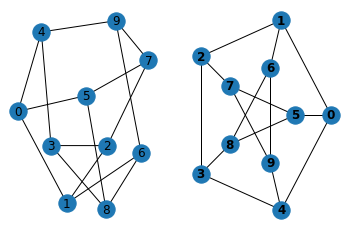

In [102]:
G = nx.petersen_graph() # A sample classical small graph

plt.subplot(121)
nx.draw(G, with_labels=True, font_weights='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

/opt/conda/envs/pytorch-py3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


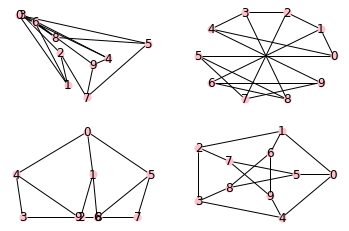

In [111]:
options = {
    'node_color': 'pink',
    'node_size': 50,
    'width': 1,
    'with_labels': True,
}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

위의 다양한 그림처럼, 원하는 구조에 따라 적절한 draw 함수를 선택하여 사용하면 됩니다.